*Recommend: read this side by side withthe code for maxium effectiveness*

**Analysis and Code Process – 2009 RECS Survey**

**Executive Summary**

The objective of the assignment is to use the features in 2009 RECS Survey Data to predict the KWH (Kilowatts per hour) in a residential place. There was 12,083 number of responses collected in the survey using a sophisticated multistage, weight probability sampling design.

**Assumptions**

The intricacy of the sampling methodology and the weighting factors for each household survey should be considered in comprehensive modelling processes. For instance, the weight factor of the survey adjusts for population discrepancy between a survey of a house located in Alaska compared to a house in New York City.

Some of the features in the dataset has a very high correlation against the target feature (KWH).  For example, DOLELSPH (Electricity cost for space heating, in whole dollars, 2009) and DOLLAREL (Total Electricity cost, in whole dollars, 2009). In my humble opinion, these features are a proxy for KWH. In addition, these data appear to be ex post facto since the objective is to predict the 2009 household KWH. If I were to use the 2009 energy usage features in my models, the prediction would be very accurate (with KWHOTH in the model, the models achieve 0.93 R-squared). However, I feel it did not capture the spirit of the challenge and the for those reasons, I decided not to use any features that are deemed retroactive.

In the survey dataset a large portion contains imputation flags. Some of the survey metrics were based on imputation instead of actual surveyed value. Due to the interest of time, I did not consider incorporating any imputation flag features into my models.
Did not conduct comprehensive feature engineering and create new features, for example: (number of garage/number of stoves) ratio, (Money spend on cooling – Money spend on heating)/ total money spend on energy.

Assumption Summary:

- did not take into consideration of survey weights
- did not use any features that are ex post facto (if it is used, it defeats the purpose of prediction)
- imputation flag not used
- did not create additional features

**Step 1- Reading Documentation**

Read the documentation (recs2009_public_codebook, public layout) of the data. Get an understanding of data types, response codes and labels. After reading the data dictionary, I noticed that the survey feature were corresponding to major housing characteristics. Most of the features are labelled without any ranking relationship.

**Step 2- Import data, Descriptive Statistics**

I coded 3 functions. Import_data, Descriptive_Statistics and Feature_visualization. I wanted to inspect the data at a high level for any major discrepancy with the data dictionary. The Descriptive_Statistics outputs key descriptive statistics about the features in the dataframe. The function also detects for objects in the dataframe, if object exists it will also display categorical frequency statistics. At this stage, I am scrolling through the df_stats and paying attention to the max, min values, and the NA counts. The max and min inform me of the nature of the data, whether it’s a scalable feature or a labelled feature (candidate of one-hotencoding). For the df_cat_stats I am inspecting the parentage count to get an understanding which categorical features are evenly distributed, and which are sparse. In the event of a sparsely distributed categorical features, there are a few ways to treat the data. 1) Use target encoding 2) hierarchical clustering (sacrifice some explainability). In the interest of time and abundance of other more significant features, I skipped that step. In the Feature_visualization section, I built the functions that take a sample (0,1) of the data to visually inspect the raw distributions of the features and further confirming the candidate features for one-hotencoding.

Output: 12083 observations, 940 features

**Step 3- First Iteration of Feature Importance**

In this section, I built three functions: random_forest (regression), corr_target and lasso as a primary guide to assist me in filtering out the insignificant features. The functions take a sample (0,1) of the data due to run time constraints. The output displays the raw value of Gini-importance (random forest output, Gini impurity, more weight on categorical), KWH_corr_abs (target feature absolute correlation), lasso_coefficient (L1 penalty forces coefficient to zero) and their respective rankings (descending). The initial screening of the feature importance led me to the conclusion that the most significant features are the in-retrospect feature such as ‘total money spent on energy in 2009'.

With the assistance of the feature importance data, I manually selected 2-3 primary/least imputed features from each of the major housing characteristic categories for dummy feature candidates. For example air conditioner yes/no, car garage yes/no, high ceiling yes/no

I did not dummy all the categorical/int variable:

1. some of them are sequentially dependent, if you already have a detached car garage, then it assumes you have a regular car garage

2. some of the features are too specific and already captured in a proxy feature. For example: ’Solar used, other than for space heating or water heating’ or ‘Charging patterns for rechargeable electronic devices’

3. some of the labelled features naturally scales well, thus no need to hot-encode. For example: number of rooms or age of the occupant

I kept almost all of the float data type features and features that naturally scales. In the keep_and_hotencode function. I dummy encoded the selected feature and kept the numeric features.

Output: 12083 observations, 163 features

**Step 4- Second Iteration of Descriptive Statistics, Manually Outlier/Data Adjustments**

The number of features has been dramatically cut from 940 to 163 (include dummies). It is currently a manageable number of features to manually inspect. Once again, I called the descriptive_stats function because I wanted to analyze the features for any potential outliers and to make certain the zero_count statistic makes sense. I isolated a few features and used a boxplot to analyze the distribution visually. I decided to remove outlier values of KWH that are greater than 60000 from the dataset. In addition, I also checked for cases where ‘Total heated square footage’ is 0 with positive KWH. But it did makes sense as utilization of the space is attributed to cooling. Furthermore, I replaced value -2 with 0; -2 corresponds to N/A in labelled features. Fortunately, there are no 0 labelled indicators when there is -2 indictor in my dataframe.

Output: 12074 observations, 163 features

**Step 5- Second Iteration of Feature Importance**

In this step, I elected to check the correlation matrix (163 x 163) because some of the features exhibit high collinearity, in particular, the binary categorical variables when dummied are 100% correlated with other. I took the opportunity to remove high multicollinearity features in this step. Next, I called the feature importance function once again with the 155 features left in the dataset. I built a feature_selection function to select the features that are ranked in the top 40 (2 out of 3 in Gini-importance_rank, lasso_coefficient_rank, KWH_corr_abs_rank). The application of this function returned 30 features that satisfied these criteria. Some of the feature included in the 30 features are ‘total square feet’, ‘washing clothes 5 to 9 loads each week indicator’ and ‘gross household income’.

Output: 12074 observations, 30 features

**Step 6- Standardize Data, Check Standardized Distribution, Split_Data**

Since this is a regression exercise, standardizing data is important to reduce Multicollinearity, because Multicollinearity could create overfitting in training, it also obscures the statistical significance of other model features. Standardizing data also helps to centre the distribution of features which allows the model to scale more efficiently when calculating the MAE. There is a multitude of ways to standardize/normalize/transform data, log normal, max-min, z-score. Next step, I split the data into training and testing.

Output: X_train: 8451 observations, 29 features, X_test: 3623 observations, 29 features

**Modelling Algorithms**

*Neural Network regression*

*XGBoost regressor*

Random forest regressor

ElasticNet

Lasso

*OLS*

The above is a hierarchical ranking of some of the popular regression model used in terms of complexity and accuracy (in general). In this assignment, I tried these 3 different models: Neural Network, XGBoost regressor and OLS in an attempt to demonstrate and contrast some of the model’s capability, explainability.

**Neural Network**

I built a 4-layer nn_model function with 2 drop out layers. The layers use ‘relu’ activation function because Neural networks are trained using stochastic gradient descent. This involves first calculating the prediction error made by the model and using the error to estimate a gradient used to update each weight in the network so that less error is made next time. This error gradient is propagated backwards through the network from the output layer to the input layer. When there are many layers in the network, the gradient diminishes via backpropagation and the error terms are so small when it reaches the output layer. This indicates the model learns a lot in the shallow layers with diminishing return as it gets into deeper layers. The random weight initiated for each layer is represented by kernel_initializer. We are training on the loss ‘mean absolute error’ and optimizer ‘adam’. I prefer ‘adam’ because it combines the attributes of both Adagrad and RMSprop. It is also a newer method, and in my case, it exhibited less fluctuation in validation MAE. The drop out rate randomly drops out neurons to help with overfitting. The epochs define how many times the model runs through the entire train data, greater the number the better the training accuracy (may not be for validation). The batch size indicates how many samples to train on each iteration. The smaller the batch size the higher propensity to overfit. I stopped training the model after 20 epochs because it started to display overfitting tendencies after 20 epochs. I instructed the model to save the best parameters. The r-square for testing data is 0.541, which is slightly below the training data at 0.567.  This difference indicates that there is no overfitting. The testing and training R-square value fluctuate slightly due to the randomly initialized weights at each layer. Furthermore, the r-squared is not comparable to classification accuracy.

In practice, I typically start deliberately overfitting (more features) my NN model. It is not a hindrance for a NN model since there are many built-in tools that can reduce overfitting in a NN. Contrast that with OLS model, it is usually not prudent to start training the model with an abundance of features. However, to compare the effectiveness of each model in this exercise, the initial feature inputs are the exact same 30 features for all 3 models.

**OLS**

There are two popular packages that can be used to build an OLS model, statsmodels and sklearn linear regression. I prefer the statsmodels because it display more inference outputs. In the OLS function we used the same 29 features from NN to get an initial result for the model goodness of fit. The R-squared and the adjusted R-squared are very similar to each other. This suggests the model is not burdened by a lot of excess features. The large F-statistics indicates the overall effectiveness (combine features) of the model is significant. There are 3 features with large p-values (WASHLOAD_-2, MONEYPY, ATHOME_0) we may need to consider removing. Next, I used a forward_regression function to add each feature sequentially and only keeping the feature with p-value smaller than 0.01. There are other feature selection methods for OLS such as backward selection, stepwise selection, selectKbest. In the interest of time, I only attempted to demonstrate with forward selection. After the forward feature selection, 4 features (17, 18, 21, 26) were excluded from the model. The new model’s R-square was almost the same, which suggest effective feature selection in the previous step. A few tasks were omitted from building this model in the interest of time: 1) Autocorrelation in the residual for each feature 2) Heteroskedasticity for each feature.
 
**XGBoost**

This is an ensemble model; it is derived and built upon a family of gradient boosting algorithms. The boosting mechanism is decision trees that are built sequentially such that each subsequent tree intents to reduce the error of the predecessors. Each tree that follows the next tree will continue to update and learn from the previous tree’s residuals. Compared against random forest, the algorithm uses bagging method and it aggregates the mean loss of n trees. Considering the dataset contain a significant number of dummied features, XGBoost algorithm works well because it has a built-in sparsity-aware split algorithm, it handles sparse data split very well. Furthermore, XGBoost is relatively fast because the sequential gradient descend optimizer allows the depth of the trees in XGBoost to be relatively shallow compared to random forest where in some instances a deep grown tree is required. Other benefits of XGBoost are related to its coding structure to leverage parallel processing, distributed computing and cache optimization.

In the code, the class XGBoostWithEarlyStop function has a built-in grid search to find the best parameters. It starts off searching the first combination of specified parameters until MAE has not improved in 5 iterations. Then it will save the best parameter. The algorithm will continue to minimize MAE on the next combination of parameters in the param_grid. The final output is the best parameter (lowest MAE) out of the grid search. I manually copied the parameters into a regular XGBoost model and trained, tested on the same dataset (random seed=42) as NN and OLS. Due to time constraints, I only introduced some of the main tunable hyperparameters and significantly limited the search space. 

**Result Comparison and Interpretation**

In this section, I reverse scaled the standardized KWH to the original value. I predicted the testing dataset using all 3 models and complied them into model_compare dataframe. As mentioned above, it is impractical to recreate the same result each time with (Randomness in initialization weights, Regularization dropout) NN. After running the models a few times, **the result in general has NN with the highest R-squared score 0.545 slightly above OLS at 0.531 (reproducible). XGBoost comes in at a close third place at 0.522(reproducible).**

The NN consistently has the highest performance and it is ‘an overkill’ usage of the model since the task at hand does not require the complexity. It is more advantageous to use NN models on NLP or computer vision task. However, what is surprising is the performance of XGBoost. One reason I believe the XGBoost consistently produced slightly inferior R-squared score against OLS is that I used a very limited search grid for hypermeter tuning due to time constraints. I believe, if I were to expand the search grid, XGBoost should obtain the second highest R-squared value. Nonetheless, the OLS performed very well is only giving up a percentage point in R-squared value.
The r-square value means how much of the target feature is explainable by the features in the model. With the NN model, explainability of each feature is limited. An only localized explanation is available using partial dependency plot or Lime (local interpretable Model-Agnostic). Second place, XGBoost offers more in-depth explainability as feature importance is calculated, aggregated for a single tree via the amount that each feature split improves the Gini score. The most explainable model is OLS. The coefficient explanation is relatively straight forward for a standardized version of OLS. For example, for an increase of 1 standard deviation in the (2: total cooling square feet), we can expect a 0.2119 standard deviation increase in KWH. We know the mean values of each of these features, we can simply inverse calculate the actual value.
 
If the client has a large underlying portfolio (For example:1 Billion) and they don’t require explanation, then the choice of model is NN. One-percent improvement is very significant when the asset base is large.
 
If the client has a medium to large underlying asset and they require some level of explanation, then the model choice is XGBoost. We can point to the feature importance that is contributing to the output.
 
If the client has a regulatory constraint or small-medium size portfolio, then OLS is the model of choice. We can describe the impact of each feature in the model.
 
**Data Engineering/ Deployment**

Built modelling pipeline with classes in Python, have the central class for data processing. For example, the main matrix computation, data augmentations that are common to each of the model products. Other prereferral calculations. For example, getting the moving average or graphing with matplotlib can be placed into an Utils class and be called in the to the main modelling class when needed. The different client configuration file can be stored in a configuration class. In that file you would have the parameters for each client. For example, client 1 only have images at 256 X 256 resolution while client 2 at 128 X128.  The saved model weights files can be called after the configuration file has been processed. This design allows the company to take on additional clients and to scale the products efficiently. 

In [1]:
import os
import pandas as pd 
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

from functools import reduce
from operator import attrgetter
from sklearn.linear_model import LassoCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow import keras

from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb

import statsmodels.api as sm

Using TensorFlow backend.


# Step 1- Reading Documentation

In [2]:
# import csv into dataframe, specify the datetimeindex which is compatiable with the inputs of the moduels

def import_data(data_path, assign_index):
    
    df_orig = pd.DataFrame()    
    df_orig = pd.read_csv(data_path, encoding='utf-8',header=0)
    df_orig.index = df_orig[assign_index]
    
    return df_orig

### Input

In [6]:
###-----------------------------------------------------------
# data_path: the location of your data, example: C:\Eric\work
# *may need to use // for pathing incase of mbcs codec error
###-----------------------------------------------------------

data_path='I:\\Eric\\Courses\\Resume Cover letters\\MMAI\\recs2009_public.csv'
assign_index='DOEID'
df_orig=import_data(data_path,assign_index)

C:\Users\Eric\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
# missing data treament
# don't need to use it here because it's already have been imputed
"""

.dropna()



.fillna(method='pad')

there are other methods check documentation online, by default 0




.replace(to_replace = np.nan, value = -99)

check online documenation




.interpolate(method ='linear', limit_direction ='forward')

check documenation online, these are some examples and options


"""

"\n\n.dropna()\n\n\n\n.fillna(method='pad')\n\nthere are other methods check documentation online, by default 0\n\n\n\n\n.replace(to_replace = np.nan, value = -99)\n\ncheck online documenation\n\n\n\n\n.interpolate(method ='linear', limit_direction ='forward')\n\ncheck documenation online, these are some examples and options\n\n\n"

In [8]:
# save the df_orig so we don't have to reimport

df=df_orig

In [9]:
# simple missing variable treament
#df_orig=df_orig.fillna(0)

# 2. Descriptive Statistics

### Inputs

In [10]:
# please specify the index value

time_var='DOEID'



In [11]:
# numeric, categorical descriptive statistics
def descriptive_stats(time_var):
    
    # describe percentiles
    pct = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
    
    # caculating data types
    df_types=pd.DataFrame(df.dtypes)
    df_types.columns=['dtypes']
    
    # split categorical types
    df_cat=df.select_dtypes(exclude=[np.number])
    #df_cat=df_cat.drop([time_var], axis=1)
    
    df_cat_type=pd.DataFrame(df_cat.dtypes)
    df_cat_type.columns=['dtypes']
    
    #caculating descriptive statistics (count, mean, std, min, pct[], max)
    df_describe=df.describe(percentiles=pct, include=[np.number]).T
    
    #count isna and zeros 
    df_miss=pd.DataFrame(df.isna().sum())
    df_miss.columns = ['NA']
    
    df_zero=pd.DataFrame((df == 0).astype(int).sum(axis=0))
    df_zero.columns=['zero_count']
    
    # median, skewness, kurtosis
    df_median=pd.DataFrame(df.median())
    df_median.columns=['median']
    
    df_skew=pd.DataFrame(df.skew())
    df_skew.columns=['skew']
    
    df_kurt=pd.DataFrame(df.kurt())
    df_kurt.columns=['kurt']
    
    # categorical descriptive statistics
    # detects if objects exisits within the dataframe
    
    if 'object' in df_cat_type.values:
        print('category variables(s) exisits')
    
        df_cat0=df_cat.describe(percentiles=pct, include=['O']).T
        df_cat1=pd.DataFrame(df_cat.apply(lambda x: x.value_counts()).T.stack())
        df_cat1.columns=['freq']
        df_cat2=pd.DataFrame(df_cat.apply(lambda x: x.value_counts(normalize=1)).T.stack())
        df_cat2.columns=['count']

        #inner join categorical tables
        Merge_frames_cat =[df_cat1, df_cat2]
        df_cat_stats  = reduce(lambda left,right:
                        pd.merge(left,right,left_index=True, right_index=True,
                        how='outer',
                        suffixes=('_count', '_pct')),
                        Merge_frames_cat)
    
        #inner join numeric tables

        Merge_frames=[df_describe, df_types, df_miss, df_zero, df_median, df_skew, df_kurt]
    
        df_stats  = reduce(lambda left,right:
                       pd.merge(left,right,left_index=True, right_index=True,
                       how='outer'),
                       Merge_frames)
    
        df_stats=df_stats.sort_values(by='count')
    
        return df_stats, df_cat_stats
    
    else:
        print('no category variable(s) detected')
        #inner join numeric tables

        Merge_frames=[df_describe, df_types, df_miss, df_zero, df_median, df_skew, df_kurt]
    
        df_stats  = reduce(lambda left,right:
                       pd.merge(left,right,left_index=True, right_index=True,
                       how='outer'),
                       Merge_frames)
    
        df_stats=df_stats.sort_values(by='count')
        
        #create an empty frame for df_cat_stats
        df_cat_stats=[]
        return df_stats, df_cat_stats

In [12]:
df_stats, df_cat_stats=descriptive_stats(time_var)


category variables(s) exisits


In [14]:
#df descriptive statistics
df_stats.head()

count      mean       std  min   5%  10%  25%  50%  75%  90%  \
ACOTHERS       12083.0 -0.752876  0.993943 -2.0 -2.0 -2.0 -2.0  0.0  0.0  0.0   
ZATTICUSE      12083.0  0.000248  0.015756  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
ZAUDIT         12083.0  0.002648  0.051396  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
ZAUTOCOOLDAY   12083.0  0.002566  0.050589  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
ZAUTOCOOLNITE  12083.0  0.002648  0.051396  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

               95%  max dtypes  NA  zero_count  median       skew         kurt  
ACOTHERS       0.0  1.0  int64   0        7239     0.0  -0.410007    -1.691847  
ZATTICUSE      0.0  1.0  int64   0       12080     0.0  63.448139  4024.332506  
ZAUDIT         0.0  1.0  int64   0       12051     0.0  19.356896   372.751130  
ZAUTOCOOLDAY   0.0  1.0  int64   0       12052     0.0  19.669083   384.936532  
ZAUTOCOOLNITE  0.0  1.0  int64   0       12051     0.0  19.356896   372.751130

In [16]:
#df categorical frequency count

df_cat_stats.head()

freq     count
METROMICRO METRO  10302.0  0.852603
           MICRO   1109.0  0.091782
           NONE     672.0  0.055615
UR         R       2427.0  0.200861
           U       9656.0  0.799139

# Feature_ Visualization

### Inputs

In [17]:
# parameter:
# frac - fraction of data to sample between 0 and 1
# when dealing with large dataset it's not feasible to try to graph their distruibution, thus take a sample
df_sample=df.sample(frac=.1)

In [18]:
# select only numeric features
df_sample=df_sample.select_dtypes(include=np.number)

# feature visualization function
def distribution():
    for i, col in enumerate(df_sample.columns):
        plt.figure(i)
        sns.distplot(df_sample[col])
        #plt.savefig('{}_{}.pdf'.format(col,'distribution'), bbox_inches='tight')  # filename chosen here
            
#correlation matrix
def corr_map():
    corrmat = df_sample.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, vmax=.8, square=True)
    
    #uncomment to save plots as pdf to current script location
    
    #plt.savefig('correlation.pdf', bbox_inches='tight')  # filename chosen here

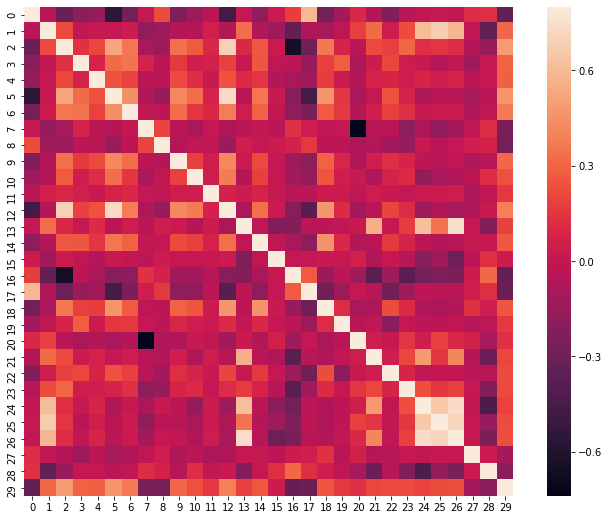

In [70]:
# may take a few mintues with large number of features, consider reducing the sampel(frac=)
# uncomment for distribution outputs
# distribution() 
corr_map()

# 3. First Iteration of Feature Importance

### Inputs

In [21]:
# parameter:
# frac - fraction of data to sample between 0 and 1
# when dealing with large dataset it's not feasible to try to model on entire population. thus take a sample
# the sample here can be different or the same from 2. feature visualization, data scientist discretion

df_sample_fi=df.sample(frac=0.2)

# set the target feature
target_feature='KWH'

In [22]:
# set target feature into its own df
y = df_sample_fi[target_feature]
X = df_sample_fi.select_dtypes(include=np.number)

# drop target feature from orginal X
X=X.drop(columns=target_feature)

In [23]:
# feature importance selection using random forest tree

def random_forest():
    
    importances=pd.DataFrame()
    
    # Build a forest and compute the impurity-based feature importances
    forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(X.columns, forest.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    #importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

    importances=importances.sort_values(by='Gini-importance', ascending=False)
    
    return importances


In [24]:
# feature Pearson correlation against the target

def corr_target(df_main):
    
    df_corr=pd.DataFrame()
    
    df_corr=df_main[df_main.columns[1:]].corr(method='pearson')[target_feature][:]
    df_corr=pd.DataFrame(df_corr)
    df_corr.columns=[target_feature+'_corr']
    
    return df_corr

In [25]:
# lasso feature selection against the target

def lasso():
    
    df_lasso=pd.DataFrame()
    
    clf = LassoCV(normalize=True, cv=3).fit(X, y)
    lasso_coe = np.abs(clf.coef_)
    df_lasso=pd.DataFrame((zip(X.columns,lasso_coe)))
    df_lasso = df_lasso.set_index([0])
    df_lasso.columns=['lasso_coefficient']
    
    return df_lasso

In [26]:
importances=random_forest()
df_corr=corr_target(df_main=df)
df_lasso=lasso()

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32036184.661884993, tolerance: 14822505.20126487
  positive)


In [27]:
# merge all 3 feature selection method and ranking them. Features cannot be compared by there values
# instead compare agaisnt its ranks.

def merge():
    #simple feature importance merge
    
    feature_imp=pd.DataFrame()
    Merge_frames_feature=[importances, df_corr, df_lasso]
    feature_imp  = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='outer'),
                          Merge_frames_feature)
    
    feature_imp[target_feature+'_corr_abs']=feature_imp[target_feature+'_corr'].abs()
    
    columns = list(feature_imp)
    for col in columns:
        feature_imp[col+'_rank']=feature_imp[col].rank(ascending=False)
    
    feature_imp=feature_imp.sort_values(by=['Gini-importance_rank',target_feature+'_corr_abs_rank','lasso_coefficient_rank'], ascending=True)
    
    return feature_imp
feature_imp=merge()



In [28]:
# Gini-importance: random forest tree
# _corr: correlation against the target feature
# _corr_abs: absolute correlation; negatvie value converted into positive, measurement is about the scale
# lasso_coefficient: the features with significant coefficient

feature_imp.head()

Gini-importance  KWH_corr  lasso_coefficient  KWH_corr_abs  \
BTUEL            0.501969  1.000000           0.138645      1.000000   
BTUELOTH         0.150349  0.880403           0.000000      0.880403   
KWHOTH           0.111408  0.880403           0.527943      0.880403   
DOLLAREL         0.077623  0.868712           0.000000      0.868712   
DOLELOTH         0.022962  0.702251           0.000000      0.702251   

          Gini-importance_rank  KWH_corr_rank  lasso_coefficient_rank  \
BTUEL                      1.0            2.0                     6.0   
BTUELOTH                   2.0            3.0                   470.5   
KWHOTH                     3.0            4.0                     1.0   
DOLLAREL                   4.0            5.0                   470.5   
DOLELOTH                   5.0            6.0                   470.5   

          KWH_corr_abs_rank  
BTUEL                   2.0  
BTUELOTH                3.0  
KWHOTH                  4.0  
DOLLAREL                5.0  
DOLELOTH                6.0

# Create Indicators and Remove 2009 energy consumption/cost features

In [29]:
dummy_ind_list=['REGIONC',
'DIVISION',
'TYPEHUQ',
'Climate_Region_Pub',
'AIA_Zone',
'METROMICRO',
'CONDCOOP',
'YEARMADERANGE',
'WALLTYPE',
'ROOFTYPE',
'STORIES',
'CELLAR',
'CONCRETE',
'BASEHEAT',
'PRKGPLC1',
'STOVENFUEL',
'AGERFRI1',
'WASHLOAD',
'H2OTYPE1',
'AIRCOND',
'AGECENAC',
'HIGHCEIL',
'SWIMPOOL',
'ONSITEGRID',
'KFUELOT',
'HHSEX',
'EMPLOYHH',
'ATHOME',
'UR']


keep_list_nn=['DOEID',
'HDD65',
'CDD65',
'HDD30YR',
'CDD30YR',
'YEARMADE',
'NUMAPTS',
'NAPTFLRS',
'NUMTHERM',
'NUMH2ONOTNK',
'TOTROOMS',
'LGT12',
'STOVEN',
'DNTHEAT',
'EDUCATION',
'NHSLDMEM',
'TOTSQFT',
'TOTHSQFT',
'TOTUSQFT',
'TOTCSQFT',
'TOTUCSQFT',
'NUMFRIG',
'TVCOLOR',
'NUMPC',
'KWH',
'HDD50',
'CDD80',
'GND_HDD65',
'WSF',
'OA_LAT',
'GWT',
'DesignDBT99',
'DesignDBT1',
'MONEYPY']

In [30]:
# to keep the keep_list_nn and dummy the features in dummy_ind_list
# returns a shortlist of features with dummy and numeric values

def keep_and_hotencode(keep_list_nn, dummy_ind_list ):
    keep_list_nn_combined=keep_list_nn+dummy_ind_list
    df_keep=df_orig[keep_list_nn_combined]
    df_keep1=pd.get_dummies(df_keep, columns=dummy_ind_list, prefix=dummy_ind_list)
    df_k_hotencode=df_keep1
    return df_k_hotencode

In [31]:
df=keep_and_hotencode(keep_list_nn, dummy_ind_list)

In [32]:
df.shape

(12083, 163)

# 4. Second iteration of descriptive statistics, check for outliers, manual adjustments 

In [33]:
# call the descriptive_stats again with reduce features

df_stats, df_cat_stats=descriptive_stats(time_var)

no category variable(s) detected


In [34]:
df_stats.sort_values('max', ascending=False)

count          mean          std      min       5%      10%  \
KWH            12083.0  11288.159398  7641.190845    17.00  2690.10  3587.40   
TOTSQFT        12083.0   2172.352892  1453.742279   100.00   605.00   738.20   
TOTHSQFT       12083.0   1675.956219  1200.819335     0.00   250.00   551.00   
TOTCSQFT       12083.0   1254.239262  1227.949667     0.00     0.00     0.00   
HDD30YR        12083.0   4135.146983  2260.543686     0.00   582.10  1151.00   
HDD65          12083.0   4141.375238  2317.759375     0.00   605.10  1066.00   
DOEID          12083.0   6042.000000  3488.205986     1.00   605.10  1209.20   
GND_HDD65      12083.0   3763.728544  2597.754419     0.00    22.00   250.00   
TOTUCSQFT      12083.0    918.130597  1064.550849     0.00     0.00     0.00   
HDD50          12083.0   1681.961764  1401.079218     0.00    10.10    38.00   
TOTUSQFT       12083.0    496.413308   677.402462     0.00     0.00     0.00   
CDD65          12083.0   1415.406108  1134.659475     0.00   261.00   344.00   
CDD30YR        12083.0   1443.503104  1021.748722     0.00   254.00   439.00   
YEARMADE       12083.0   1971.062402    24.817912  1920.00  1920.00  1930.00   
CDD80          12083.0    139.568485   264.186908     0.00     0.00     0.00   
NUMAPTS        12083.0      4.486717    29.662574    -2.00    -2.00    -2.00   
DesignDBT1     12083.0     90.359431     6.166669    60.00    81.00    83.00   
GWT            12083.0     59.128693     8.678293    36.00    47.00    49.00   
DesignDBT99    12083.0     20.256311    15.337626   -23.00    -5.00     2.00   
LGT12          12083.0      0.441778     1.228820     0.00     0.00     0.00   
OA_LAT         12083.0      5.656046     6.797205     0.00     0.00     0.00   
MONEYPY        12083.0     13.027394     6.804078     1.00     3.00     5.00   
TOTROOMS       12083.0      5.995283     2.178903     1.00     3.00     3.00   
NUMPC          12083.0      1.386742     1.191753     0.00     0.00     0.00   
TVCOLOR        12083.0      2.588182     1.367281     0.00     1.00     1.00   
NHSLDMEM       12083.0      2.665646     1.515664     1.00     1.00     1.00   
EDUCATION      12083.0      3.391459     1.683744     0.00     1.00     1.00   
NUMFRIG        12083.0      1.265497     0.515308     0.00     1.00     1.00   
NUMTHERM       12083.0      0.792105     1.360757    -2.00    -2.00    -2.00   
NUMH2ONOTNK    12083.0      0.032691     0.184682     0.00     0.00     0.00   
...                ...           ...          ...      ...      ...      ...   
HIGHCEIL_1     12083.0      0.283539     0.450734     0.00     0.00     0.00   
AIRCOND_0      12083.0      0.177357     0.381986     0.00     0.00     0.00   
AIRCOND_1      12083.0      0.822643     0.381986     0.00     0.00     0.00   
AGECENAC_-2    12083.0      0.384590     0.486518     0.00     0.00     0.00   
AGECENAC_1     12083.0      0.054457     0.226926     0.00     0.00     0.00   
AGECENAC_2     12083.0      0.102375     0.303154     0.00     0.00     0.00   
AGECENAC_3     12083.0      0.187784     0.390556     0.00     0.00     0.00   
AGECENAC_5     12083.0      0.076554     0.265893     0.00     0.00     0.00   
AGERFRI1_42    12083.0      0.060747     0.238875     0.00     0.00     0.00   
AGECENAC_41    12083.0      0.134569     0.341277     0.00     0.00     0.00   
AGECENAC_42    12083.0      0.059671     0.236885     0.00     0.00     0.00   
HIGHCEIL_-2    12083.0      0.044774     0.206815     0.00     0.00     0.00   
SWIMPOOL_-2    12083.0      0.280559     0.449291     0.00     0.00     0.00   
SWIMPOOL_0     12083.0      0.645204     0.478471     0.00     0.00     0.00   
SWIMPOOL_1     12083.0      0.074237     0.262166     0.00     0.00     0.00   
ONSITEGRID_-2  12083.0      0.994124     0.076433     0.00     1.00     1.00   
ONSITEGRID_0   12083.0      0.003559     0.059551     0.00     0.00     0.00   
ONSITEGRID_1   12083.0      0.002317     0.048085     0.00     0.00     0.00   
HIGHCEIL_0     12

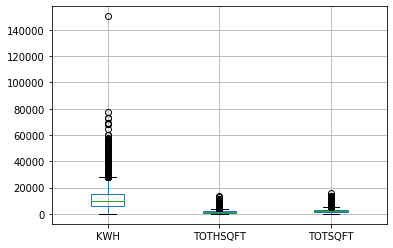

In [35]:
# manually check the distribution of the following variable due to the high std

df.boxplot(column=['KWH', 'TOTHSQFT', 'TOTSQFT'])

In [36]:
# KWH and TOTHSQFT were the only two feature that concerned me when inspecting the min 50% max diff
# decided to remove records of KWH above 60000 as outliers (subjective)

df=df[df['KWH'] <= 60000]

In [37]:
# manually check if there are any case where total heated square feet = 0 but with positive KWH


df.loc[df['TOTHSQFT'] == 0, ['KWH', 'TOTSQFT', 'TOTHSQFT', 'TOTCSQFT', 'TOTUCSQFT']].head()

KWH  TOTSQFT  TOTHSQFT  TOTCSQFT  TOTUCSQFT
DOEID                                              
13     9775     1387         0         0       1387
17     2079     1482         0       247       1235
29     2447      400         0       200        200
32     6925      840         0         0        840
69     9398      947         0       947          0

In [38]:
# replace value -2 with 0; -2 corresponds to N/A. 
# Fortunately there are no 0 indictor when there are -2 indictor in my dataframe

df=df.replace(-2, 0)

# 5. Second iteration of Feature Importance/ futher feature selection

In [39]:
# need to filter out more features due to high collinearity 

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [40]:
# removed the following features due to degree of freedom after dummy or extreme high collinearity

corr_remove_list=['PRKGPLC1_-2', 'UR_R', 'NAPTFLRS', 'CDD65', 'CDD30YR', 'STOVENFUEL_-2', 'ATHOME_1', 'TOTHSQFT']

df_feature_select = df.drop(corr_remove_list, axis=1)

In [69]:
# another round of feature importance with the collinearity removed and increased sampling

# parameter:
# frac - fraction of data to sample between 0 and 1
# when dealing with large dataset it's not feasible to try to model on entire population. thus take a sample
# the sample here can be different or the same from 2. feature visualization, data scientist discretion

df_sample_fi=df_feature_select.sample(frac=0.5, random_state=23)

# set the target feature
target_feature='KWH'

# set target feature into its own df
y = df_sample_fi[target_feature]
X = df_sample_fi.select_dtypes(include=np.number)

# drop target feature from orginal X
X=X.drop(columns=target_feature)

importances=random_forest()
df_corr=corr_target(df_main=df_feature_select)
df_lasso=lasso()
feature_imp=merge()
feature_imp.head()

Gini-importance  KWH_corr  lasso_coefficient  KWH_corr_abs  \
STORIES_-2         0.098959 -0.347361           0.000000      0.347361   
REGIONC_3          0.090659  0.334353        1990.361744      0.334353   
TOTCSQFT           0.054096  0.471289           0.916175      0.471289   
NHSLDMEM           0.047368  0.278824         566.358629      0.278824   
SWIMPOOL_1         0.040047  0.280816        3645.752326      0.280816   

            Gini-importance_rank  KWH_corr_rank  lasso_coefficient_rank  \
STORIES_-2                   1.0          154.0                   112.0   
REGIONC_3                    2.0            6.0                     3.0   
TOTCSQFT                     3.0            2.0                    68.0   
NHSLDMEM                     4.0           10.0                    22.0   
SWIMPOOL_1                   5.0            9.0                     1.0   

            KWH_corr_abs_rank  
STORIES_-2                6.0  
REGIONC_3                 8.0  
TOTCSQFT                  2.0  
NHSLDMEM                 16.0  
SWIMPOOL_1               15.0

# Feature Selection Function

In [42]:
# for a NN I wanted to keep more features and let the NN refine the features
# between Gini importance, lasso and absolute coefficient, if 2 out of the three is higher than caughtoff I keep it in the model
# as I mentioned before it is not a bad thing to overfit a neural network in the beginning, because we have many parameters to
# that deals with overfitting in NN

# returns a list of features and the actual dataframe of the selected features

def feature_selection(caughtoff, df_main):

    feature_imp_1=feature_imp[((feature_imp['Gini-importance_rank'] <= caughtoff) & (feature_imp['lasso_coefficient_rank'] <= caughtoff))
                             | ((feature_imp['Gini-importance_rank'] <= caughtoff) & (feature_imp['KWH_corr_abs_rank'] <= caughtoff))
                             | ((feature_imp['lasso_coefficient_rank'] <= caughtoff) & (feature_imp['KWH_corr_abs_rank'] <= caughtoff))]

    feature_imp_1ist=list(feature_imp_1.index.values)
    feature_imp_1ist.append(target_feature)
    df_feature_select1=df_main[feature_imp_1ist]
    return df_feature_select1, feature_imp_1ist

In [43]:
df_feature_select1, feature_imp_1ist=feature_selection(caughtoff=40,df_main=df_feature_select )

In [44]:
df_feature_select1.shape
feature_imp_1ist

['STORIES_-2',
 'REGIONC_3',
 'TOTCSQFT',
 'NHSLDMEM',
 'SWIMPOOL_1',
 'TOTROOMS',
 'TVCOLOR',
 'STOVENFUEL_1',
 'UR_U',
 'NUMFRIG',
 'NUMTHERM',
 'LGT12',
 'TOTSQFT',
 'CDD80',
 'NUMPC',
 'AIA_Zone_3',
 'AGECENAC_-2',
 'WASHLOAD_-2',
 'MONEYPY',
 'WASHLOAD_4',
 'STOVENFUEL_5',
 'DesignDBT1',
 'WASHLOAD_3',
 'YEARMADE',
 'GWT',
 'OA_LAT',
 'AIA_Zone_5',
 'ATHOME_0',
 'REGIONC_1',
 'KWH']

# 6. Standarize Data, Check if distriubtion approximate normal, split data

In [45]:
from sklearn.preprocessing import StandardScaler

# standardize data

def standardize_data(df):
    scaler = StandardScaler()
    scaler = scaler.fit(df)
    df_std = scaler.transform(df)
    return df_std

In [46]:
df_std=pd.DataFrame(standardize_data(df=df_feature_select1))

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


KWH_corr
REGIONC_3     0.334353
TOTCSQFT      0.471289
NHSLDMEM      0.278824
SWIMPOOL_1    0.280816
TOTROOMS      0.431368
TVCOLOR       0.364296
STOVENFUEL_1 -0.270550
UR_U         -0.267287
NUMFRIG       0.289459
NUMTHERM      0.228205
LGT12         0.162825
TOTSQFT       0.374171
CDD80         0.193078
NUMPC         0.249843
AIA_Zone_3    0.025493
AGECENAC_-2  -0.336012
WASHLOAD_-2  -0.315276
MONEYPY       0.239513
WASHLOAD_4    0.164797
STOVENFUEL_5  0.163848
DesignDBT1    0.209364
WASHLOAD_3    0.215500
YEARMADE      0.221031
GWT           0.222166
OA_LAT        0.256875
AIA_Zone_5    0.243166
ATHOME_0     -0.099391
REGIONC_1    -0.214978
KWH           1.000000

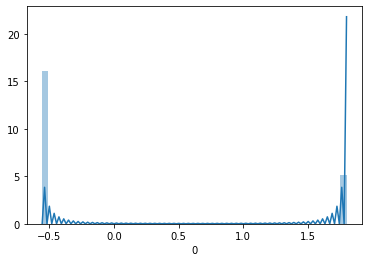

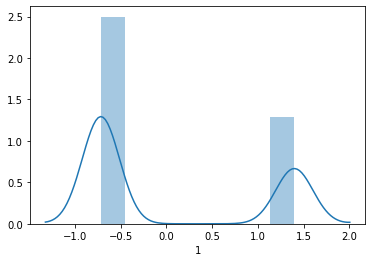

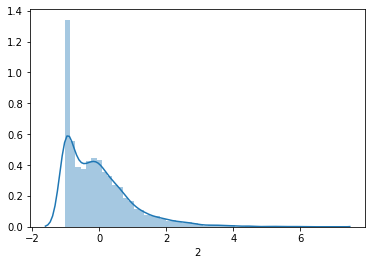

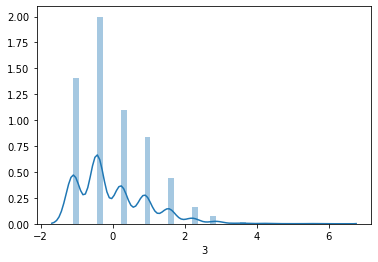

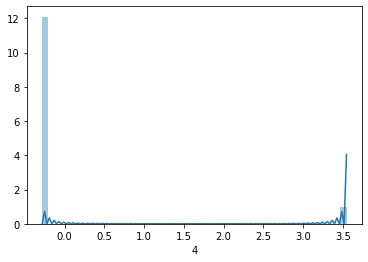

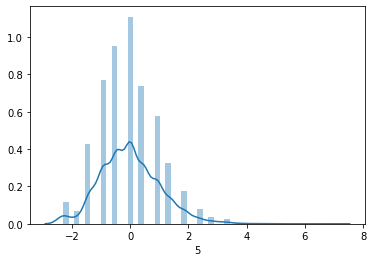

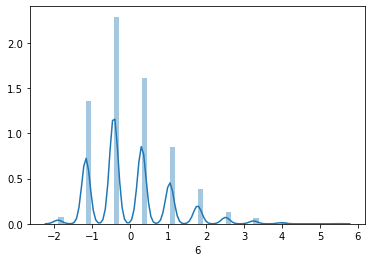

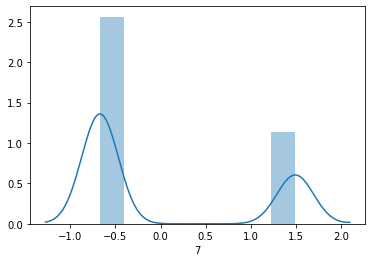

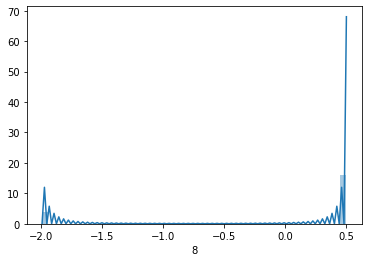

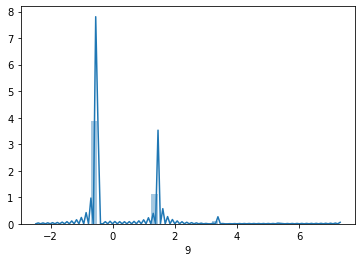

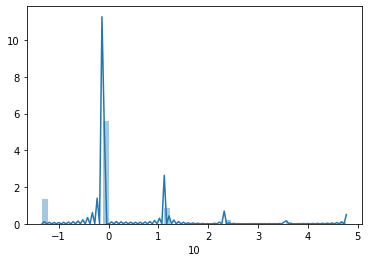

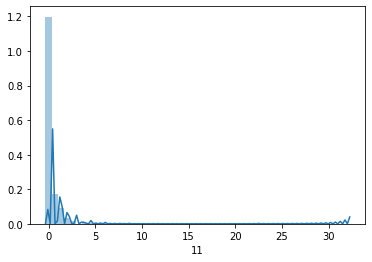

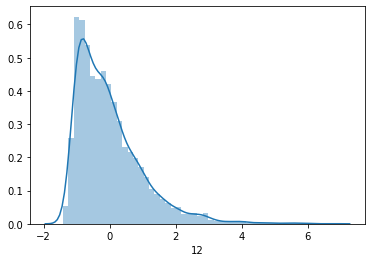

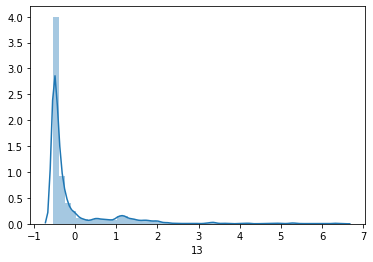

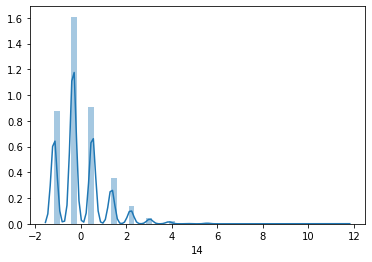

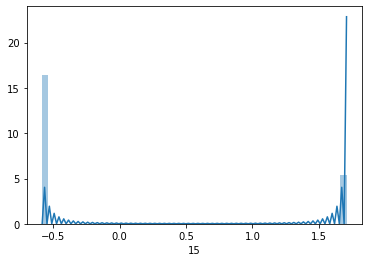

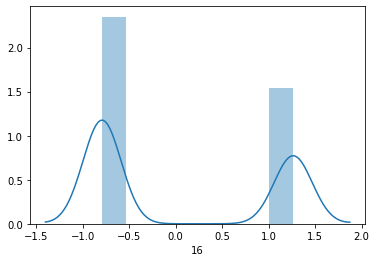

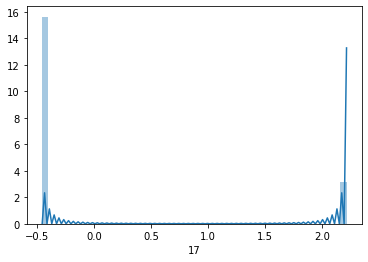

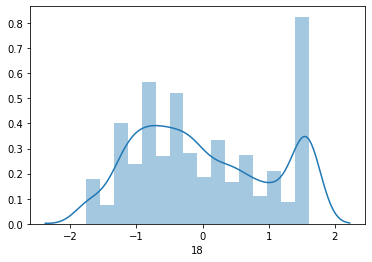

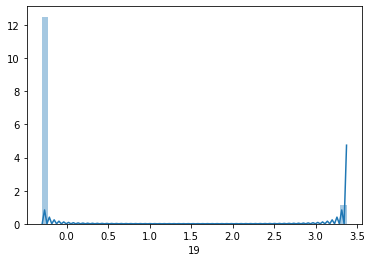

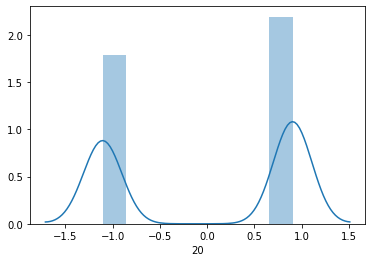

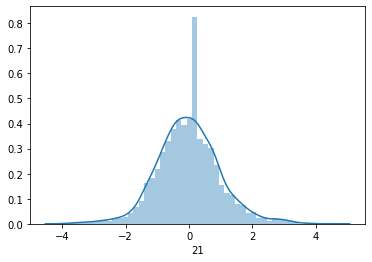

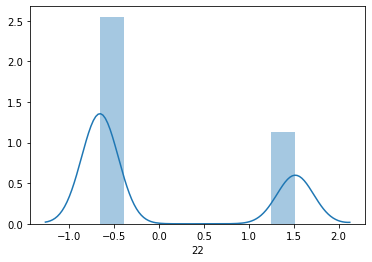

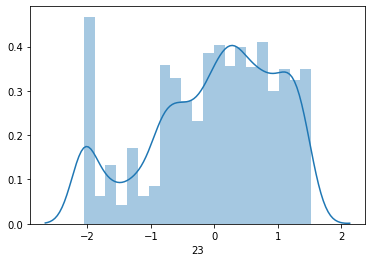

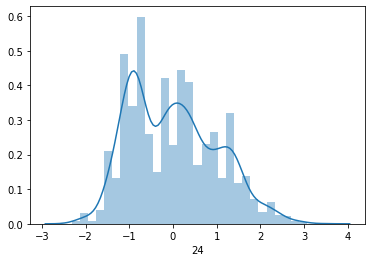

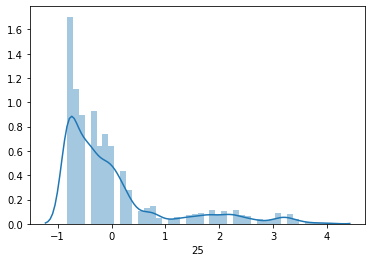

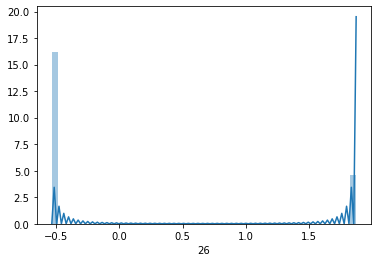

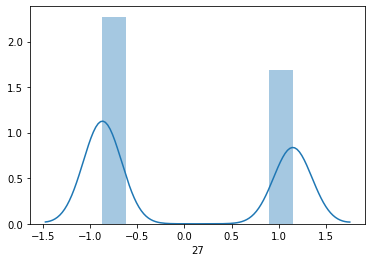

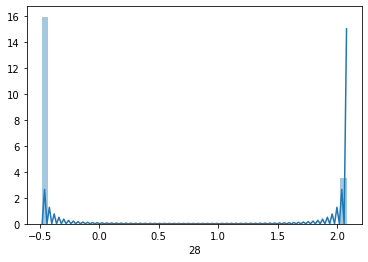

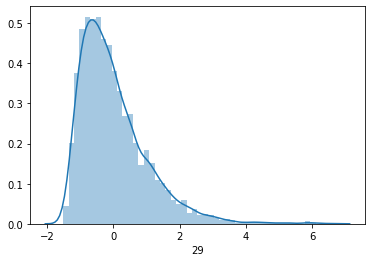

In [47]:
# parameter:
# frac - fraction of data to sample between 0 and 1
# when dealing with large dataset it's not feasible to try to graph their distruibution, thus take a sample

# visualy inspect the correlation agains the target feature and to analyze the std features
df_sample=df_std.sample(frac=.33)
distribution()
corr_target(df_main=df_feature_select1)

# Model Shallow Neural Net

In [48]:
# train test split function

def split_data(df_std, size ):
    y_input = df_std.iloc[:, -1:]
    X_input=df_std.iloc[:, :-1]
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=size, random_state=42)
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    return X_train, X_test, y_train, y_test

In [49]:
X_train, X_test, y_train, y_test = split_data(df_std=df_std, size=0.3)

(8451, 29)
(8451, 1)
(3623, 29)
(3623, 1)


In [50]:
# shallow NN model

def nn_model(l1, l2, l3, l4, do, do1, epochs, batch_size, validation_split, filepath):

    model = Sequential()

    # The Input Layer :
    model.add(Dense(l1, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
    model.add(Dense(l2, kernel_initializer='normal',activation='relu'))
    model.add(Dropout(do))
    model.add(Dense(l3, kernel_initializer='normal',activation='relu'))
    model.add(Dropout(do1))
    model.add(Dense(l4, kernel_initializer='normal',activation='relu'))


    # The Output Layer :
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # Compile the network :
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])
    model.summary()
    
    checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
    
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        shuffle=True,
        callbacks=[checkpointer]
    )
    
    return model, history


In [51]:
# fully connected layer 1 to 4
l1=64
l2=64
l3=64
l4=64

# dropout rate layers
do=0.6
do1=0.55

# training parameters
epochs=20
batch_size=64
validation_split=0.15

# saved model weights
filepath="weights-simple.hdf5"

# call the function 
model, history=nn_model(l1, l2, l3, l4, do, do1, epochs, batch_size, validation_split, filepath)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1920      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

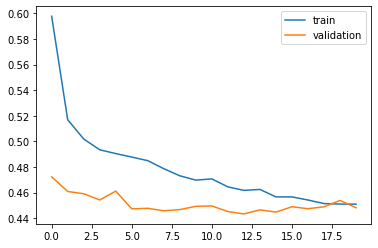

In [52]:
# graph the train validation chart, don't want to see large deviation

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [53]:
from sklearn.metrics import r2_score
# predict y on train dataset
X_train_pred = model.predict(X_train)
print('the r-square for training data', r2_score(y_train, X_train_pred))


# predict y on testing dataset
X_test_pred = model.predict(X_test)

print('the r-square for testing data', r2_score(y_test, X_test_pred))


y_test_pred = model.predict(X_test)
y_test_pred=pd.DataFrame(y_test_pred)

the r-square for training data 0.5733398903231173
the r-square for testing data 0.5498421405284681


# OLS Model

In [54]:
# for a OLS I wanted to keep less features and the stepwise feature selection do the work
# for purpose of comparing results, use the same features as NN and XGBoost
# between Gini importance, lasso and absolute coefficient, if 2 out of the three is higher rank than caughtoff I keep it in the model

df_feature_select_ols, feature_imp_1ist=feature_selection(caughtoff=40,df_main=df_feature_select)

In [55]:
df_feature_select_ols.shape

(12074, 30)

In [56]:
# call the standardize_data and split_data function for OLS model

df_std_ols=pd.DataFrame(standardize_data(df=df_feature_select_ols))
X_train_ols, X_test_ols, y_train_ols, y_test_ols = split_data(df_std=df_std_ols, size=0.3)

(8451, 29)
(8451, 1)
(3623, 29)
(3623, 1)


In [57]:
# zip the orig features with the corresponding std number into a dictionary

dictionary_features = dict(zip(range(len(feature_imp_1ist)), (feature_imp_1ist)))
dictionary_features

{0: 'STORIES_-2',
 1: 'REGIONC_3',
 2: 'TOTCSQFT',
 3: 'NHSLDMEM',
 4: 'SWIMPOOL_1',
 5: 'TOTROOMS',
 6: 'TVCOLOR',
 7: 'STOVENFUEL_1',
 8: 'UR_U',
 9: 'NUMFRIG',
 10: 'NUMTHERM',
 11: 'LGT12',
 12: 'TOTSQFT',
 13: 'CDD80',
 14: 'NUMPC',
 15: 'AIA_Zone_3',
 16: 'AGECENAC_-2',
 17: 'WASHLOAD_-2',
 18: 'MONEYPY',
 19: 'WASHLOAD_4',
 20: 'STOVENFUEL_5',
 21: 'DesignDBT1',
 22: 'WASHLOAD_3',
 23: 'YEARMADE',
 24: 'GWT',
 25: 'OA_LAT',
 26: 'AIA_Zone_5',
 27: 'ATHOME_0',
 28: 'REGIONC_1',
 29: 'KWH'}

In [67]:
# simple OLS function with constant

def OLS(y_train, X_train, X_test):
    model = sm.OLS(y_train, X_train).fit()
    predictions = model.predict(X_test)
    print_model = model.summary()
    print(print_model)
    return predictions

In [68]:
# return prediction and output the regression fit results

predictions=OLS(y_train=y_train_ols, X_train=X_train_ols, X_test=X_test_ols)

                                 OLS Regression Results                                
Dep. Variable:                     29   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              301.4
Date:                Tue, 03 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:51:20   Log-Likelihood:                         -9038.9
No. Observations:                8451   AIC:                                  1.814e+04
Df Residuals:                    8422   BIC:                                  1.834e+04
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
# forward feature selection

def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add {} with p-value '.format(best_feature, best_pval))

        if not changed:
            break

    return included

fwd_feature_list=forward_regression(X_train_ols, y_train_ols)

Add 2 with p-value 


C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add 1 with p-value 
Add 5 with p-value 
Add 7 with p-value 
Add 3 with p-value 
Add 4 with p-value 
Add 8 with p-value 
Add 6 with p-value 
Add 11 with p-value 
Add 13 with p-value 
Add 15 with p-value 
Add 10 with p-value 
Add 28 with p-value 
Add 0 with p-value 
Add 9 with p-value 
Add 14 with p-value 
Add 20 with p-value 
Add 19 with p-value 
Add 22 with p-value 
Add 25 with p-value 
Add 24 with p-value 
Add 12 with p-value 
Add 16 with p-value 
Add 27 with p-value 
Add 23 with p-value 


In [61]:
# sort new feature list

fwd_feature_list.sort()
print(fwd_feature_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 22, 23, 24, 25, 27, 28]


In [62]:
# call the OLS function, to refit the model with new set of features

predictions=OLS(y_train=y_train_ols, X_train=X_train_ols[fwd_feature_list], X_test=X_test_ols[fwd_feature_list])

                                 OLS Regression Results                                
Dep. Variable:                     29   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              348.9
Date:                Tue, 03 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:48:49   Log-Likelihood:                         -9043.9
No. Observations:                8451   AIC:                                  1.814e+04
Df Residuals:                    8426   BIC:                                  1.831e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# XGBoost

In [63]:
# output dataframe standardized for xgb (with is the same as NN and OLS)

df_std_xbg=pd.DataFrame(standardize_data(df=df_feature_select_ols))

In [64]:
# XGBoostWithEarlyStop class, it has built-in regressor or classificer,
# it can split data and train on grid search pipeline

class XGBoostWithEarlyStop(BaseEstimator):
    def __init__(self, early_stopping_rounds=5, test_size=0.1, 
                 eval_metric='mae', **estimator_params):
        self.early_stopping_rounds = early_stopping_rounds
        self.test_size = test_size
        self.eval_metric=eval_metric='mae'        
        if self.estimator is not None:
            self.set_params(**estimator_params)

    def set_params(self, **params):
        return self.estimator.set_params(**params)

    def get_params(self, **params):
        return self.estimator.get_params()

    def fit(self, X, y):
        x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=42)
        self.estimator.fit(x_train, y_train, 
                           early_stopping_rounds=self.early_stopping_rounds, 
                           eval_metric=self.eval_metric, eval_set=[(x_val, y_val)])
        return self

    def predict(self, X):
        return self.estimator.predict(X)

class XGBoostRegressorWithEarlyStop(XGBoostWithEarlyStop):
    def __init__(self, *args, **kwargs):
        self.estimator = XGBRegressor()
        super(XGBoostRegressorWithEarlyStop, self).__init__(*args, **kwargs)

class XGBoostClassifierWithEarlyStop(XGBoostWithEarlyStop):
    def __init__(self, *args, **kwargs):
        self.estimator = XGBClassifier()
        super(XGBoostClassifierWithEarlyStop, self).__init__(*args, **kwargs)

In [66]:
# call the baseline model

pipe = Pipeline([
    ('xgb', XGBoostRegressorWithEarlyStop())
])

# specify the parameter associated with the baseline model 
param_grid = {

    'xgb__n_estimators': [30, 50],
    'xgb__subsample': [0.9],
    'xgb__reg_alpha': [1, 1.5],
    'xgb__max_depth': [6,7,8,10]
}

# define the scoring function
grid = GridSearchCV(pipe, param_grid, scoring='r2')

# fit the model
grid.fit(df_std_xbg.iloc[:, :-1], df_std_xbg.iloc[:, -1:] )

# save best model parameters
best_model=grid.best_params_
print(grid.best_params_)

[0]	validation_0-mae:0.77384
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:0.66818
[2]	validation_0-mae:0.60208
[3]	validation_0-mae:0.55610
[4]	validation_0-mae:0.52956
[5]	validation_0-mae:0.51359
[6]	validation_0-mae:0.50497
[7]	validation_0-mae:0.49603
[8]	validation_0-mae:0.49057
[9]	validation_0-mae:0.48612
[10]	validation_0-mae:0.48260
[11]	validation_0-mae:0.48228
[12]	validation_0-mae:0.47995
[13]	validation_0-mae:0.47983
[14]	validation_0-mae:0.47975
[15]	validation_0-mae:0.47848
[16]	validation_0-mae:0.47846
[17]	validation_0-mae:0.47956
[18]	validation_0-mae:0.48040
[19]	validation_0-mae:0.48186
[20]	validation_0-mae:0.48273
[21]	validation_0-mae:0.48121
Stopping. Best iteration:
[16]	validation_0-mae:0.47846



C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-mae:0.76663
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:0.66304
[2]	validation_0-mae:0.59610
[3]	validation_0-mae:0.55168
[4]	validation_0-mae:0.52147
[5]	validation_0-mae:0.49934
[6]	validation_0-mae:0.48652
[7]	validation_0-mae:0.47515
[8]	validation_0-mae:0.47033
[9]	validation_0-mae:0.46693
[10]	validation_0-mae:0.46184
[11]	validation_0-mae:0.45984
[12]	validation_0-mae:0.45940
[13]	validation_0-mae:0.45872
[14]	validation_0-mae:0.45879
[15]	validation_0-mae:0.45866
[16]	validation_0-mae:0.45819
[17]	validation_0-mae:0.45918
[18]	validation_0-mae:0.45954
[19]	validation_0-mae:0.45957
[20]	validation_0-mae:0.45958
[21]	validation_0-mae:0.46030
Stopping. Best iteration:
[16]	validation_0-mae:0.45819

[0]	validation_0-mae:0.74913
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:0.64523
[2]	validation_0-mae:0.58132
[3]	validation_0-mae:0.54229
[4]	validation_0-mae:0.51621
[5]	validation_0-mae:0

[9]	validation_0-mae:0.46983
[10]	validation_0-mae:0.46677
[11]	validation_0-mae:0.46533
[12]	validation_0-mae:0.46433
[13]	validation_0-mae:0.46343
[14]	validation_0-mae:0.46278
[15]	validation_0-mae:0.46285
[16]	validation_0-mae:0.46270
[17]	validation_0-mae:0.46577
[18]	validation_0-mae:0.46486
[19]	validation_0-mae:0.46500
[20]	validation_0-mae:0.46319
[21]	validation_0-mae:0.46318
Stopping. Best iteration:
[16]	validation_0-mae:0.46270

[0]	validation_0-mae:0.74948
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:0.64579
[2]	validation_0-mae:0.58059
[3]	validation_0-mae:0.53603
[4]	validation_0-mae:0.50720
[5]	validation_0-mae:0.48716
[6]	validation_0-mae:0.47479
[7]	validation_0-mae:0.46837
[8]	validation_0-mae:0.46308
[9]	validation_0-mae:0.45998
[10]	validation_0-mae:0.45686
[11]	validation_0-mae:0.45582
[12]	validation_0-mae:0.45610
[13]	validation_0-mae:0.45565
[14]	validation_0-mae:0.45508
[15]	validation_0-mae:0.45450
[16]	validation_0-mae

[4]	validation_0-mae:0.53748
[5]	validation_0-mae:0.51894
[6]	validation_0-mae:0.50769
[7]	validation_0-mae:0.49698
[8]	validation_0-mae:0.49023
[9]	validation_0-mae:0.48661
[10]	validation_0-mae:0.48515
[11]	validation_0-mae:0.48487
[12]	validation_0-mae:0.48331
[13]	validation_0-mae:0.48113
[14]	validation_0-mae:0.47999
[15]	validation_0-mae:0.47996
[16]	validation_0-mae:0.47957
[17]	validation_0-mae:0.47983
[18]	validation_0-mae:0.48228
[19]	validation_0-mae:0.48135
[20]	validation_0-mae:0.48097
[21]	validation_0-mae:0.48185
Stopping. Best iteration:
[16]	validation_0-mae:0.47957

[0]	validation_0-mae:0.76204
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:0.65063
[2]	validation_0-mae:0.57890
[3]	validation_0-mae:0.53653
[4]	validation_0-mae:0.50639
[5]	validation_0-mae:0.48749
[6]	validation_0-mae:0.47560
[7]	validation_0-mae:0.46621
[8]	validation_0-mae:0.46028
[9]	validation_0-mae:0.45899
[10]	validation_0-mae:0.45724
[11]	validation_0-mae:0.45

[4]	validation_0-mae:0.53363
[5]	validation_0-mae:0.51674
[6]	validation_0-mae:0.50878
[7]	validation_0-mae:0.50161
[8]	validation_0-mae:0.49560
[9]	validation_0-mae:0.49210
[10]	validation_0-mae:0.49037
[11]	validation_0-mae:0.49031
[12]	validation_0-mae:0.48928
[13]	validation_0-mae:0.48871
[14]	validation_0-mae:0.48994
[15]	validation_0-mae:0.49014
[16]	validation_0-mae:0.48926
[17]	validation_0-mae:0.48942
[18]	validation_0-mae:0.49093
Stopping. Best iteration:
[13]	validation_0-mae:0.48871

[0]	validation_0-mae:0.76014
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:0.64914
[2]	validation_0-mae:0.57420
[3]	validation_0-mae:0.53450
[4]	validation_0-mae:0.50740
[5]	validation_0-mae:0.49226
[6]	validation_0-mae:0.48076
[7]	validation_0-mae:0.47296
[8]	validation_0-mae:0.47015
[9]	validation_0-mae:0.46847
[10]	validation_0-mae:0.46714
[11]	validation_0-mae:0.46627
[12]	validation_0-mae:0.46757
[13]	validation_0-mae:0.46846
[14]	validation_0-mae:0.46

[17]	validation_0-mae:0.49409
[18]	validation_0-mae:0.49501
[19]	validation_0-mae:0.49540
[20]	validation_0-mae:0.49535
[21]	validation_0-mae:0.49551
Stopping. Best iteration:
[16]	validation_0-mae:0.49373

[0]	validation_0-mae:0.75686
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:0.64434
[2]	validation_0-mae:0.57112
[3]	validation_0-mae:0.52714
[4]	validation_0-mae:0.50064
[5]	validation_0-mae:0.48322
[6]	validation_0-mae:0.47386
[7]	validation_0-mae:0.46651
[8]	validation_0-mae:0.46516
[9]	validation_0-mae:0.46161
[10]	validation_0-mae:0.45950
[11]	validation_0-mae:0.45864
[12]	validation_0-mae:0.45874
[13]	validation_0-mae:0.45797
[14]	validation_0-mae:0.45736
[15]	validation_0-mae:0.45703
[16]	validation_0-mae:0.45774
[17]	validation_0-mae:0.45701
[18]	validation_0-mae:0.45714
[19]	validation_0-mae:0.45722
[20]	validation_0-mae:0.45856
[21]	validation_0-mae:0.45962
[22]	validation_0-mae:0.46004
Stopping. Best iteration:
[17]	validation_0-mae:0.

In [ ]:
# predict testing dataset
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=6 ,n_estimators=30,reg_alpha=1.5, subsample =0.9 )
xg_reg.fit(X_train,y_train)
pred_xgb = xg_reg.predict(X_test)


# feature importance
print(xg_reg.feature_importances_)

# plot feature importance
plt.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
plt.show()

# Compare Result

In [ ]:
# create the target feature to scale
var_y=pd.DataFrame(df['KWH'])
target_scaler = StandardScaler()
target_scaler.fit(var_y)

In [ ]:
# inverse transform predicted OLS standardized KWH back to OLS predicted KWH

predictions_ols=pd.DataFrame(predictions)
predictions_ols.columns=['ols_pred']
predictions_ols_norm = pd.DataFrame(target_scaler.inverse_transform(predictions_ols))

In [ ]:
# inverse transform predicted NN standardized KWH back to NN predicted KWH

y_test_pred=pd.DataFrame(y_test_pred)
y_test_pred.columns=['NN_pred']
y_test_pred_NN_norm = pd.DataFrame(target_scaler.inverse_transform(y_test_pred))
y_test_actual = pd.DataFrame(target_scaler.inverse_transform(y_test))

In [ ]:
# inverse transform predicted xgb standardized KWH back to xgb predicted KWH

pred_xgb=pd.DataFrame(pred_xgb)
pred_xgb.columns=['xgb_pred']
pred_xgb_norm = pd.DataFrame(target_scaler.inverse_transform(pred_xgb))

In [ ]:
# merge the dataframes into a single dataframe

model_compare=y_test_ols.merge(predictions_ols, left_index=True, right_index=True)
model_compare=model_compare.reset_index()

Merge_frames=[model_compare, y_test_pred, predictions_ols_norm, y_test_pred_NN_norm, y_test_actual, pred_xgb, pred_xgb_norm]
model_compare  = reduce(lambda left,right:
            pd.merge(left,right,left_index=True, right_index=True,
            how='left'),
            Merge_frames)

model_compare.columns=['index', 'y_test_std', 'ols_pred_std', 'NN_pred_std', 'ols_pred_inverse', 'NN_pred_inverse', 'y_test_actual', 'xgb_pred_std', 'xgb_pred_inverse']
model_compare=model_compare[['index', 'y_test_actual', 'xgb_pred_inverse', 'NN_pred_inverse', 'ols_pred_inverse','y_test_std', 'NN_pred_std', 'ols_pred_std', 'xgb_pred_std']]

# Final Predicted Results

In [ ]:
model_compare.head()

In [ ]:
print('OLS model prediction on the test dataset results in a R-squared of',r2_score(model_compare['y_test_actual'], model_compare['ols_pred_inverse']))
print('NN model prediction on the test dataset results in a R-squared of',r2_score(model_compare['y_test_actual'], model_compare['NN_pred_inverse']))
print('xgboost model prediction on the test dataset results in a R-squared of',r2_score(model_compare['y_test_actual'], model_compare['xgb_pred_inverse']))

# Mock Production/ My Code Engineering Vision

In [ ]:
# load weights into new model
from keras.models import load_model
saved_model=load_model("weights-simple.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
score = saved_model.predict(X_test)
score

In [ ]:
# my thoughts on how to scale and design model production pipeline

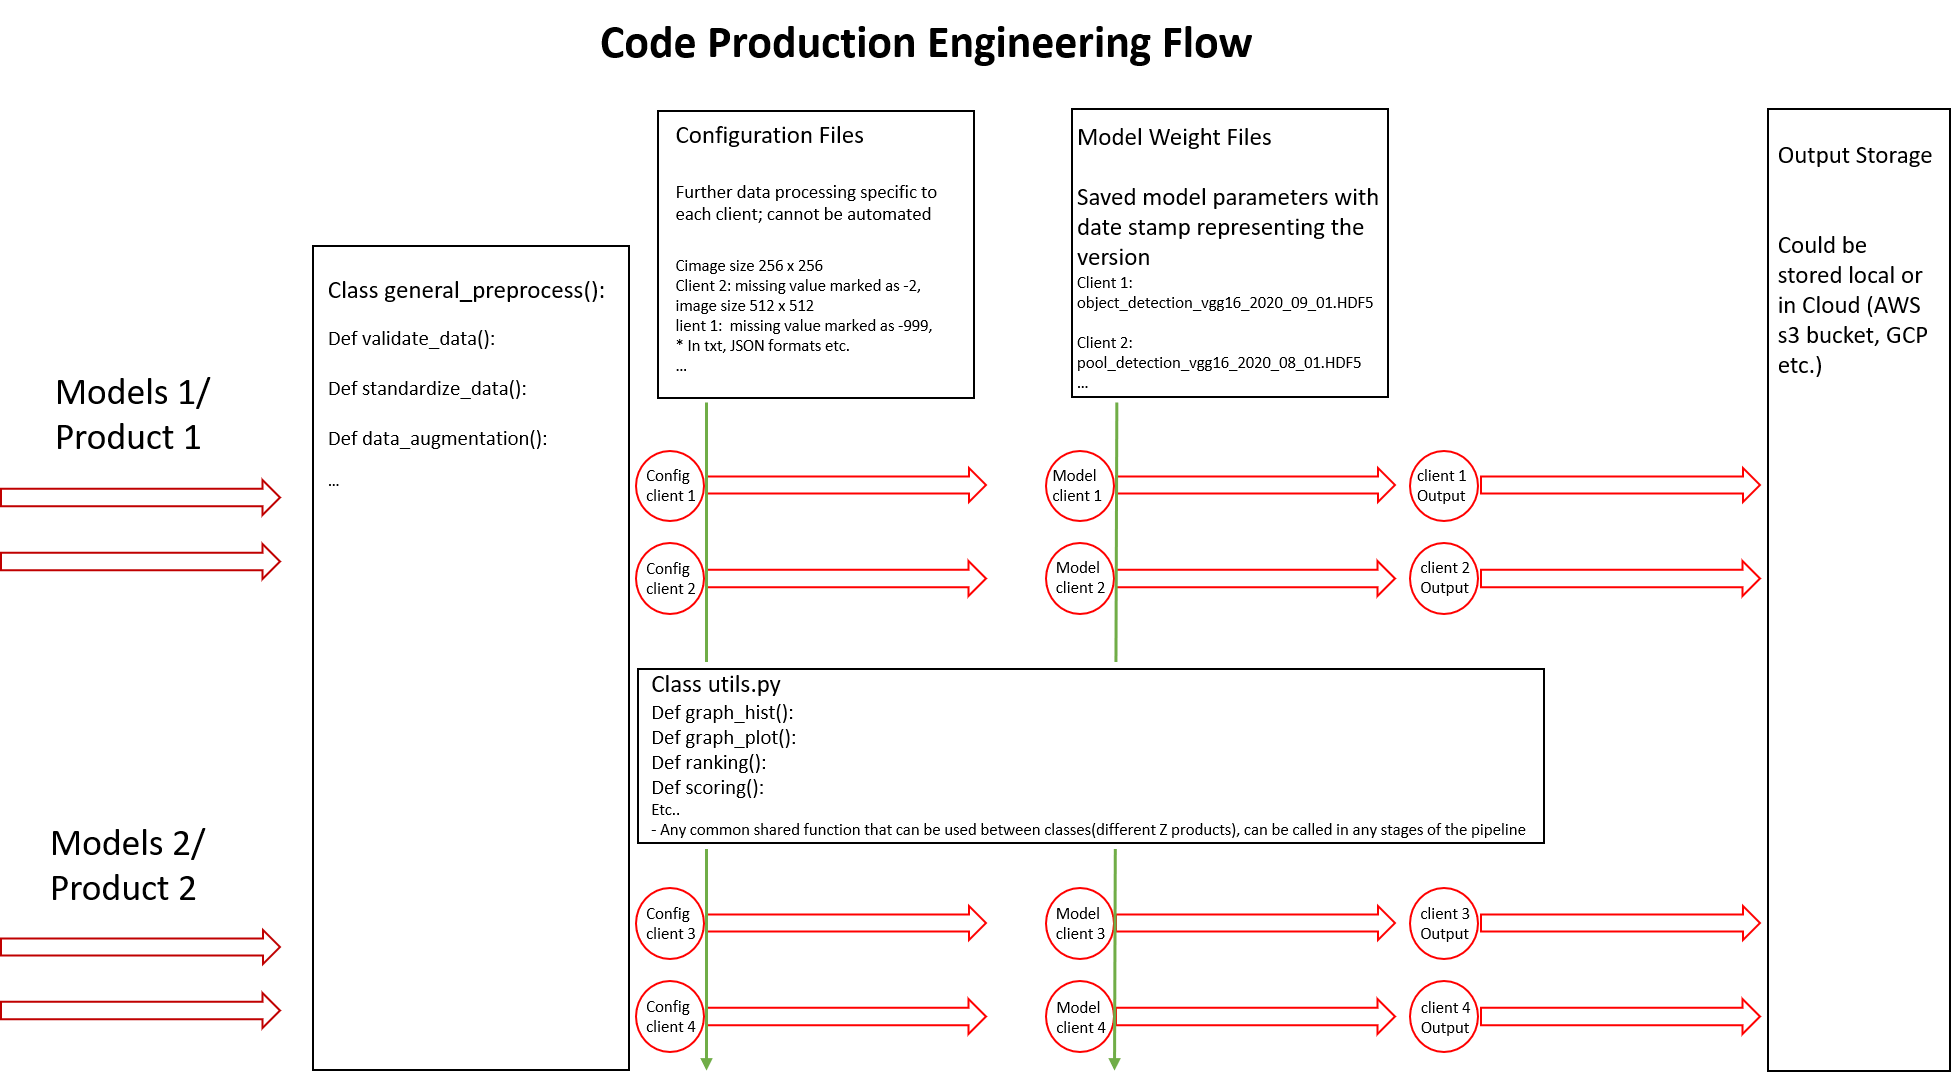